In [1]:
"""
Insert all necessary libraries for question 1 to 4
"""

import os  # Provides a way of using operating system-dependent functionality
import pandas as pd  # Used for data manipulation and analysis
import numpy as np  # Supports large, multi-dimensional arrays and matrices, along with mathematical functions
import matplotlib.pyplot as plt  # Used for creating static, animated, and interactive plots
import seaborn as sns  # Provides a high-level interface for drawing attractive and informative statistical graphics
import matplotlib as mpl  # Base matplotlib interface for working with styles, fonts, etc.
import scipy  # Fundamental package for scientific computing
import scipy.stats as stats  # Contains a large number of probability distributions and statistical functions
from scipy.stats import norm  # Imports the normal distribution object for statistical calculations
from scipy.optimize import minimize  # Uses numerical optimization for functions without closed-form solutions (e.g., YTM)
import statsmodels.api as sm  # Provides classes and functions for statistical models and tests
from statsmodels.formula.api import ols  # Facilitates specifying statistical models using formulas


# Question 4

# Task 1

In [5]:
# Part 1
# Black-Scholes Price Function for Put Option
def black_scholes_put(S0, T, rf, E, sigma):
    d1 = (np.log(S0 / E) + (rf + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    return E * np.exp(-rf * T) * norm.cdf(-d2) - S0 * norm.cdf(-d1)

# European Put Option Pricing using the Binomial Model
def european_put(S0, T, m, rf, E, sigma):
    dt = T / m
    u = np.exp(sigma * np.sqrt(dt))
    d = 1 / u
    p = (np.exp(rf * dt) - d) / (u - d)
    
    # Initialize the option prices at maturity
    option_prices = np.maximum(E - S0 * u**np.arange(m, -1, -1) * d**np.arange(0, m + 1), 0)
    
    # Step backwards to calculate the option price at time 0
    for i in range(m - 1, -1, -1):
        option_prices = np.exp(-rf * dt) * (p * option_prices[1:] + (1 - p) * option_prices[:-1])
    
    return option_prices[0]

# Test the Binomial Model for a given set of parameters
S0 = 15
T = 2
m = 4
rf = 0.05
E = 18
sigma = 0.3

binomial_price = european_put(S0, T, m, rf, E, sigma)
bs_price = black_scholes_put(S0, T, rf, E, sigma)

print(f'Binomial Price: {binomial_price:.2f}')
print(f'Black-Scholes Price: {bs_price:.2f}')


Binomial Price: 3.61
Black-Scholes Price: 3.32


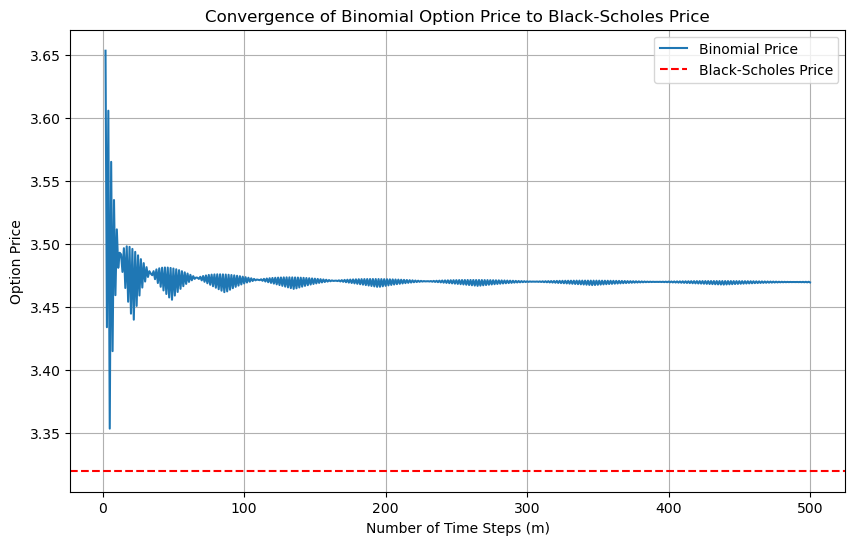

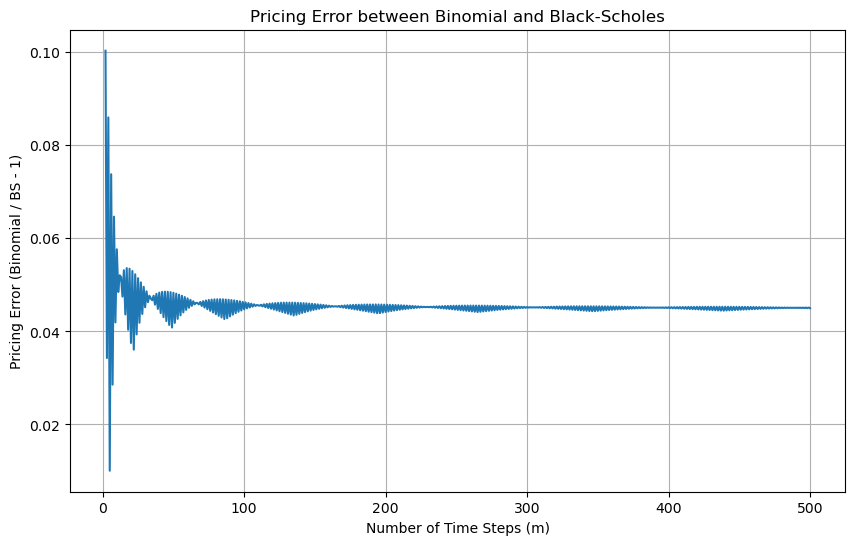

In [7]:
# Part 2: Graphing Convergence of Binomial Price to Black-Scholes Price
time_steps = np.arange(2, 501)
binomial_prices = [european_put(S0, T, m, rf, E, sigma) for m in time_steps]

plt.figure(figsize=(10, 6))
plt.plot(time_steps, binomial_prices, label='Binomial Price')
plt.axhline(bs_price, color='r', linestyle='--', label='Black-Scholes Price')
plt.xlabel('Number of Time Steps (m)')
plt.ylabel('Option Price')
plt.title('Convergence of Binomial Option Price to Black-Scholes Price')
plt.legend()
plt.grid(True)
plt.show()

# Part 3: Graphing Pricing Error
pricing_errors = [(binomial - bs_price) / bs_price for binomial in binomial_prices]

plt.figure(figsize=(10, 6))
plt.plot(time_steps, pricing_errors, label='Pricing Error')
plt.xlabel('Number of Time Steps (m)')
plt.ylabel('Pricing Error (Binomial / BS - 1)')
plt.title('Pricing Error between Binomial and Black-Scholes')
plt.grid(True)
plt.show()


Explanation: Black-Scholes Formula (black_scholes_put): This function computes the price of a European put option using the Black-Scholes formula. Binomial Model (european_put): This function calculates the price of a European put option using the binomial option pricing model. It sets up the parameters, computes the option prices at maturity, and steps backward to compute the option price at time 0.

Part 1: The european_put function is tested with the given parameters, and we print both the binomial price and the Black-Scholes price.

Part 2: This plot shows how the binomial price converges to the Black-Scholes price as the number of time steps increases.

Part 3: This plot is generated to show the pricing error, which is the difference between the binomial price and the Black-Scholes price.

# Task 2

In [11]:
# Black-Scholes Formula for a European Put Option
def black_scholes_put(S0, T, rf, E, sigma):
    d1 = (np.log(S0 / E) + (rf + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    return E * np.exp(-rf * T) * norm.cdf(-d2) - S0 * norm.cdf(-d1)

# Binomial Option Pricing Model for European Put
def european_put(S0, T, m, rf, E, sigma):
    dt = T / m
    u = np.exp(sigma * np.sqrt(dt))
    d = 1 / u
    p = (np.exp(rf * dt) - d) / (u - d)
    
    # Initialize the option prices at maturity
    option_prices = np.maximum(E - S0 * u**np.arange(m, -1, -1) * d**np.arange(0, m + 1), 0)
    
    # Step backwards to calculate the option price at time 0
    for i in range(m - 1, -1, -1):
        option_prices = np.exp(-rf * dt) * (p * option_prices[1:] + (1 - p) * option_prices[:-1])
    
    return option_prices[0]

# Given parameters
S0 = 100
E = 100
rf = 0.03
sigma = 0.2
T = 5
m = 700

# 1. Rf ranges from 0.01 to 0.10 in steps of 0.001
rf_range = np.arange(0.01, 0.101, 0.001)
binomial_prices_rf = [european_put(S0, T, m, r, E, sigma) for r in rf_range]

# 2. Sigma ranges from 0.01 to 0.5 in steps of 0.1
sigma_range = np.arange(0.01, 0.51, 0.1)
binomial_prices_sigma = [european_put(S0, T, m, rf, E, s) for s in sigma_range]

# 3. m ranges from 5 to 1000 in steps of 10
m_range = np.arange(5, 1001, 10)
binomial_prices_m = [european_put(S0, T, m_val, rf, E, sigma) for m_val in m_range]

# 4. S0 ranges from 50 to 150 in steps of 1
S0_range = np.arange(50, 151, 1)
binomial_prices_S0 = [european_put(S0_val, T, m, rf, E, sigma) for S0_val in S0_range]


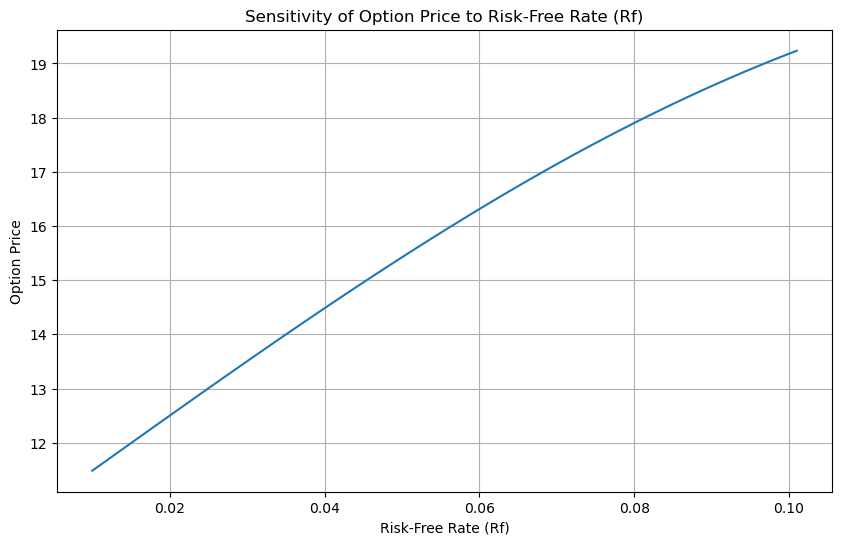

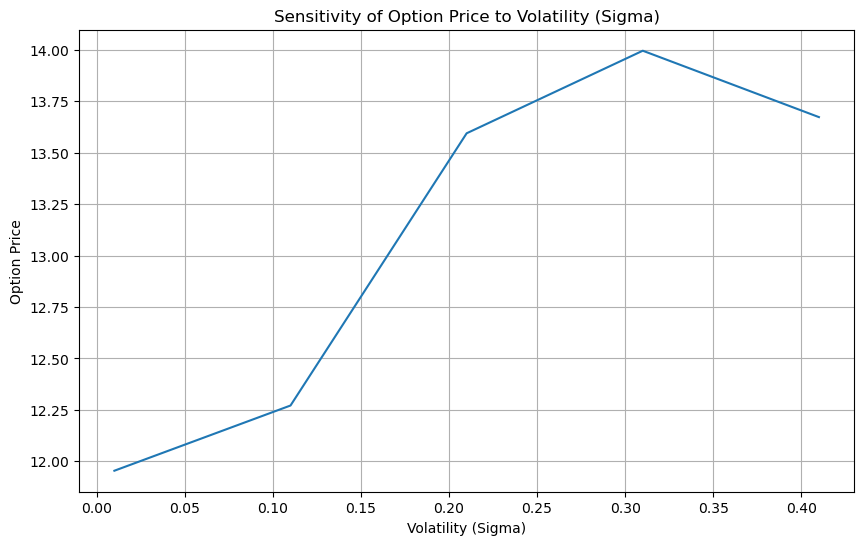

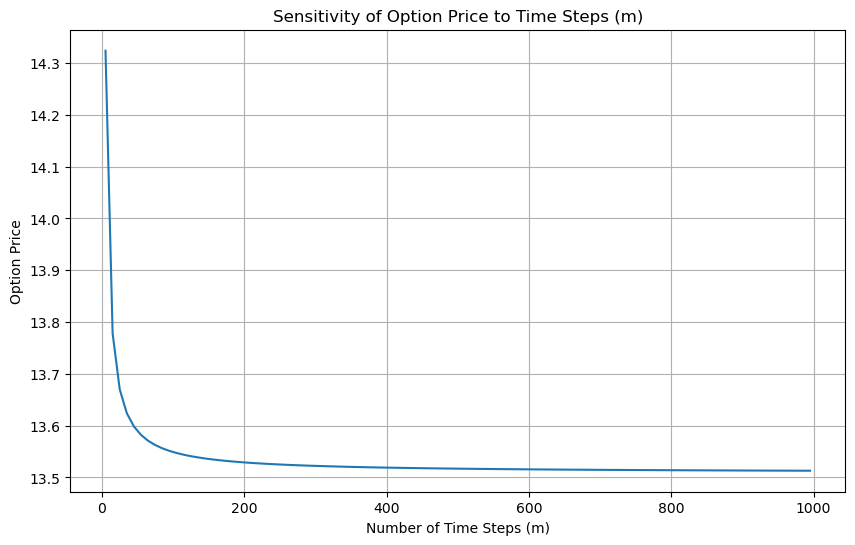

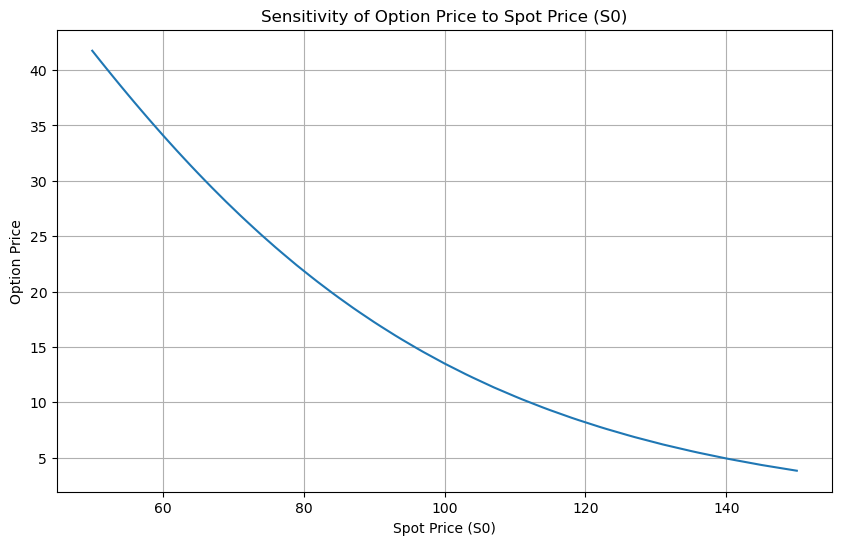

In [13]:
# Plotting results

# 1. Sensitivity to Rf
plt.figure(figsize=(10, 6))
plt.plot(rf_range, binomial_prices_rf, label="Binomial Price vs Rf")
plt.xlabel("Risk-Free Rate (Rf)")
plt.ylabel("Option Price")
plt.title("Sensitivity of Option Price to Risk-Free Rate (Rf)")
plt.grid(True)
plt.show()

# 2. Sensitivity to Sigma
plt.figure(figsize=(10, 6))
plt.plot(sigma_range, binomial_prices_sigma, label="Binomial Price vs Sigma")
plt.xlabel("Volatility (Sigma)")
plt.ylabel("Option Price")
plt.title("Sensitivity of Option Price to Volatility (Sigma)")
plt.grid(True)
plt.show()

# 3. Sensitivity to m
plt.figure(figsize=(10, 6))
plt.plot(m_range, binomial_prices_m, label="Binomial Price vs m")
plt.xlabel("Number of Time Steps (m)")
plt.ylabel("Option Price")
plt.title("Sensitivity of Option Price to Time Steps (m)")
plt.grid(True)
plt.show()

# 4. Sensitivity to S0
plt.figure(figsize=(10, 6))
plt.plot(S0_range, binomial_prices_S0, label="Binomial Price vs S0")
plt.xlabel("Spot Price (S0)")
plt.ylabel("Option Price")
plt.title("Sensitivity of Option Price to Spot Price (S0)")
plt.grid(True)
plt.show()


# Results & Economic Intuition:
Risk-Free Rate (Rf): As the risk-free rate increases, the price of the put option decreases. This is because a higher risk-free rate reduces the present value of the strike price (E), and since the put option profits when the spot price is lower than the strike price, a higher Rf reduces the incentive to exercise the option.

Volatility (Sigma): As volatility increases, the price of the put option increases. Volatility makes the underlying asset more uncertain, which increases the likelihood of the option ending up in the money, thus increasing its value.

Number of Time Steps (m): As time steps increase, the binomial option price converges towards the Black-Scholes price. More time steps make the binomial model a finer approximation of the continuous-time model.

Spot Price (S0): As the spot price increases, the price of the put option decreases. The put option becomes less valuable as the asset's current price rises, because the option is less likely to be exercised (the asset price needs to be lower than the strike price for it to be profitable).